<h1>Aim: Analyzing CIA Factbook data using SQLite and Python</h1>

<p>This project mainly focus on how to use SQLite and python to querry data from database.</p>

<p>The Factbook contains demographic information like:<p>
<ul>
<li><b>population:</b> The population as of 2015</li>
<li><b>population_growth:</b> This is annual population growth rate in percentage</li>
<li><b>area:</b> The total area includes land and water both.</li>
</ul>

<h3>connecting and querring factbook.db</h3>

In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("factbook.db")
q = "select * from sqlite_master where type='table';"

pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q2 = "select * from facts limit 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


<p>Here are the descriptions for columns of the facts table:</p>
<ul>
<li><b>name:</b> The name of the country.</li>
<li><b>population:</b> The country's population.</li>
<li><b>population_growth:</b> The country's population growth as a percentage.</li>
<li><b>birth_rate:</b> The country's birth rate, or the number of births a year per 1,000 people.</li>
<li><b>death_rate:</b> The country's death rate, or the number of death a year per 1,000 people.</li>
<li><b>area:</b> The country's total area (both land and water).</li>
<li><b>area_land:</b> The country's land area in square kilometers.</li>
<li><b>area_water:</b> The country's waterarea in square kilometers.</li>
</ul>

<h3>Summary Statistics</h3>

<h4>Minimum population</h4>

In [5]:
q3 = "select MIN(population) min_population from facts;"
pd.read_sql_query(q3, conn)

,min_population
0,0


<h4>Maximum population</h4>

In [6]:
q4 = "select MAX(population) max_population from facts;"
pd.read_sql_query(q4, conn)

,max_population
0,7256490011


<h4>Minimum population growth</h4>

In [7]:
q5 = "select MIN(population_growth) min_population_growth from facts;"
pd.read_sql_query(q5, conn)

,min_population_growth
0,0.0


<h4>Maximum population growth</h4>

In [8]:
q6 = "select MAX(population_growth) max_population_growth from facts;"
pd.read_sql_query(q6, conn)

,max_population_growth
0,4.02


<h3>Exploring Outliers</h3>

In [10]:
q7 = "select name,population from facts where population=0;"
pd.read_sql_query(q7, conn)

,name,population
0,Antarctica,0


In [11]:
q8 = "select name,population from facts where population=7256490011;"
pd.read_sql_query(q8, conn)

,name,population
0,World,7256490011


<p>By looking at country with population 0 we can conclude its not the country. Antartica is polar region around north, and of course with no human population</p>
<p>Also by looking at max population country the conclusion is clear it's not the country, rather it's world population.</p>
<p>we can conclude that both are outliers and should be removed from dataset to get accurate result.</p>

<h3>Histogram</h3>

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc935cbc048>,
      dtype=object)

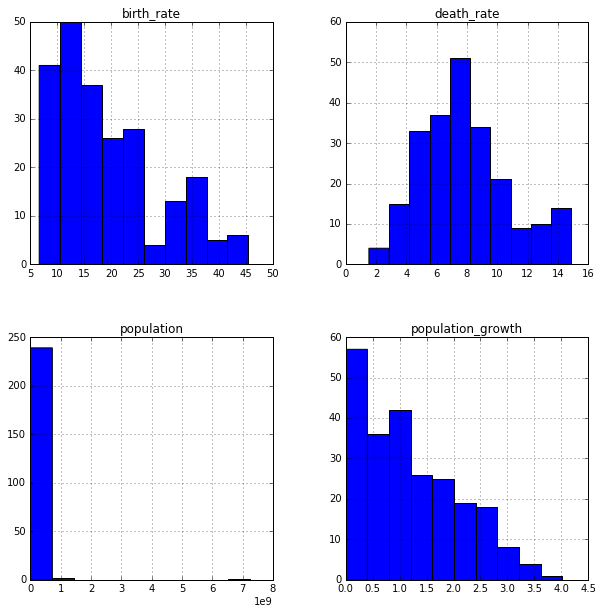

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q9 = '''select population, population_growth, birth_rate, death_rate from 
        facts where population not in ('Antarctica','World')'''
pd.read_sql_query(q9, conn).hist(ax=ax)

<h3>Which countries have the highest population density?</h3>

In [15]:
q10 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 10"
pd.read_sql_query(q10, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
